In [80]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# Analysis of Energy Usage

## Loading Data

The first dataset is  



In [4]:
test = pd.read_csv('data/testing.csv')
test.describe

<bound method NDFrame.describe of                      date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:30:00          50      40  19.890000  46.066667   
1     2016-01-11 18:00:00          60      50  19.890000  45.766667   
2     2016-01-11 18:40:00         230      70  19.926667  45.863333   
3     2016-01-11 18:50:00         580      60  20.066667  46.396667   
4     2016-01-11 19:30:00         100      10  20.566667  53.893333   
...                   ...         ...     ...        ...        ...   
4927  2016-05-27 13:50:00         230       0  25.500000  47.133333   
4928  2016-05-27 14:30:00          60       0  25.566667  46.633333   
4929  2016-05-27 15:50:00         100       0  25.500000  45.633333   
4930  2016-05-27 17:20:00         100       0  25.566667  46.560000   
4931  2016-05-27 17:40:00         270      10  25.500000  46.596667   

             T2       RH_2         T3       RH_3     T4  ...  Press_mm_hg  \
0     19.200000  44.590000  19.79000

The second dataset comes preprepared for training the model.

In [16]:
train = pd.read_csv('data/training.csv')
train.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
NSM              int64
WeekStatus      object
Day_of_week     object
dtype: object

distribution of the response variable. My computer doesn't seem to handle the number of data rows. So I summarise. I also have to convert date to a a datetime data type.

In [22]:
train['datetime']=pd.to_datetime(train["date"])
train['datepart']=train['datetime'].dt.date

date                   object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
NSM                     int64
WeekStatus             object
Day_of_week            object
datetime       datetime64[ns]
dtype: obj

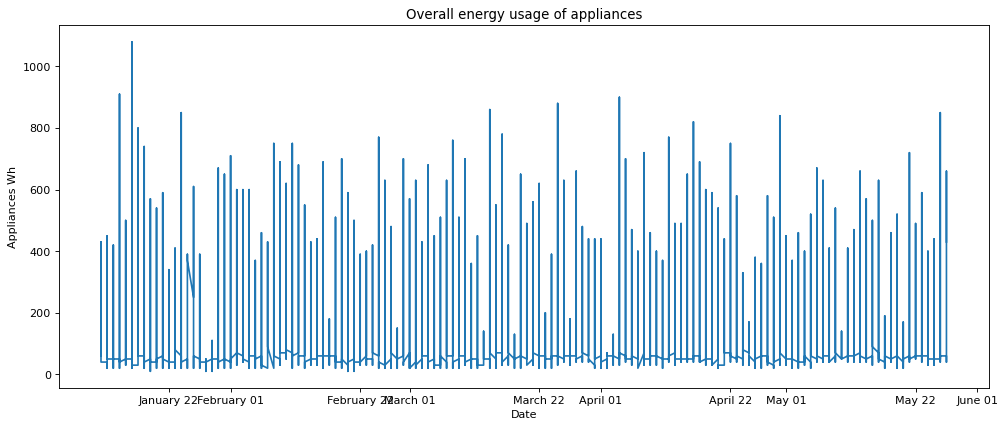

In [36]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax1 = fig.add_subplot()
ax1.set_ylabel('Appliances Wh')
ax1.set_xlabel('Date')
ax1.set_title('Overall energy usage of appliances')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
ax1.plot('datepart', 'Appliances', data=train)

In [ ]:
Fig 1. (A) Appliances energy consumption measurement for the whole period, (B) A closer look at 
the first week of data.

Our Tasks include - Exploring relationships within the features.  

<AxesSubplot:title={'center':'Distribution of load for 10 minute intervals'}, xlabel='Appliances Wh', ylabel='Number of 10 minute intervals'>

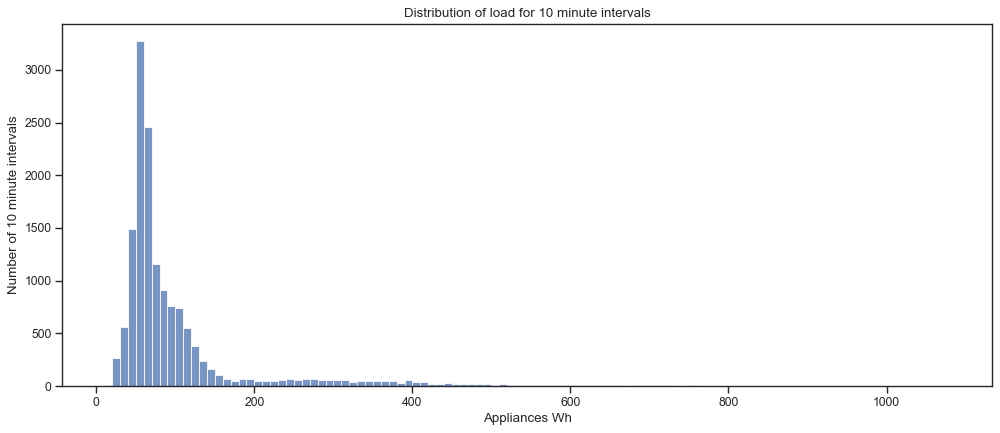

In [83]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax1 = fig.add_subplot()
ax1.set_xlabel('Appliances Wh')
ax1.set_ylabel('Number of 10 minute intervals')
ax1.set_title('Distribution of load for 10 minute intervals')
sns.histplot(data=train,x='Appliances',binwidth=10)

<AxesSubplot:title={'center':'Distribution of load for 10 minute intervals'}, xlabel='Appliances'>

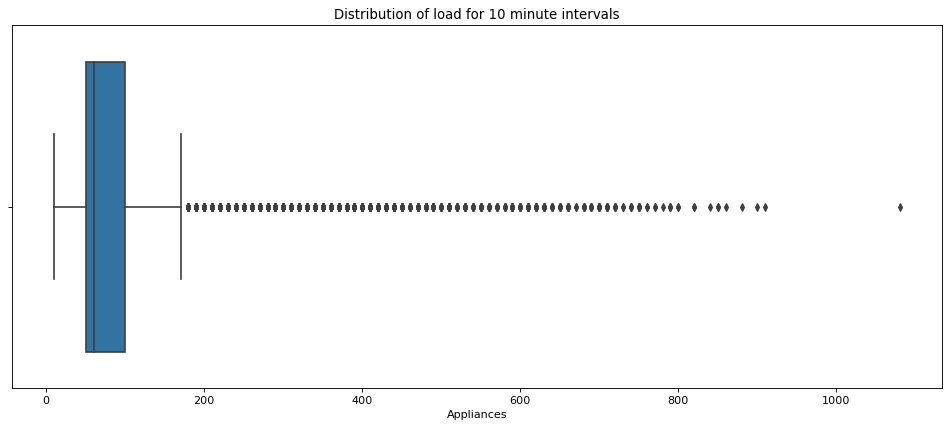

In [51]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax2 = fig.add_subplot()
ax2.set_xlabel('Appliances Wh')
ax2.set_title('Distribution of load for 10 minute intervals')
sns.boxplot(data=train,x='Appliances',ax=ax2)

In [63]:
#we need to create dummy variables for weekday/weekend variable.
weekstatus_df=pd.get_dummies(train['WeekStatus'])

array([0, 1], dtype=uint8)

In [95]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = py.corrcoef(x, y)[0][1]
    # Make the label
    label = str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.5), size = 50, xycoords = ax.transAxes)

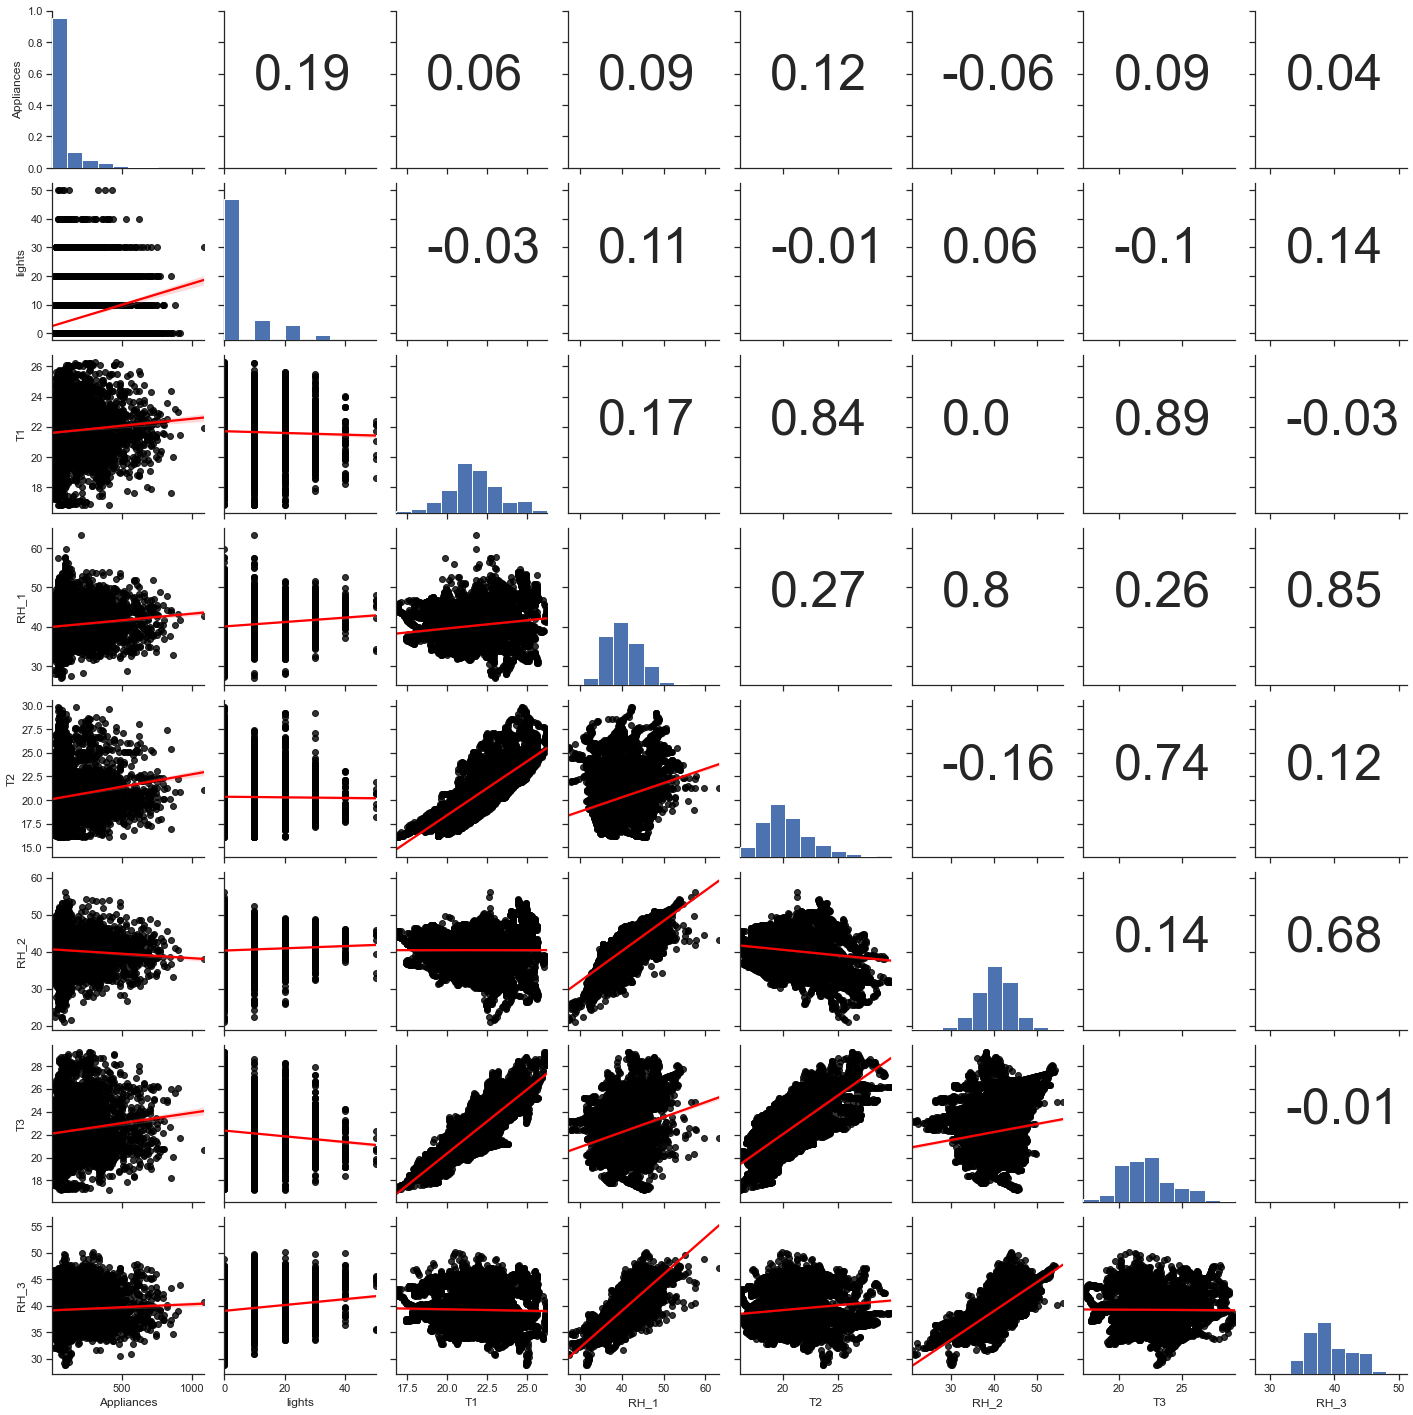

In [98]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= train, vars =["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3"])
grid = grid.map_diag(plt.hist)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

Fig. 3 from paper. Pairs plot. Relationship between the energy consumption of appliances with: lights, T1, RH1, 
T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2and RH2 correspond to the 
living room conditions. We can see that temperatures are highly correlated within the house. Humidities are quite correlated.
However the time period of 10 minute intervals is probably too short given that behaviour of the occupants is driven by longer term factors, and insulation in the house, plus interaction with the outside environment is taking place slower than these short windows.